# Python for Data Science Teaching Session 5: Machine Learning

## Introduction

### Session Style

This session aims to be a whirlwind tour of machine learning. Touching on classification, regression, clustering, and ensemble methods, as well as techniques for managing model generalisation and hyper-parameter tuning.

For this reason, the pace will be fast and we will not focus on the details of how each model works, why it works, and how to get the most out of them. 

Instead, I will provide multiple links for further reading at the end of each section.

We will also be focusing on intermediate complexity machine learning models, skipping over the basics such as linear/logistic regression, decision trees, and naïve Bayes. This allows us to show off the power of Python for machine learning but perhaps doesn't give a realisic view into the process of performing machine learning in real life.

### Session Objectives

- Train-test splits and over/under-fitting
- Classification with k-nearest neighbours
- Regression with support vector machines
- Clustering with k-means
- Ensemble methods (bagging) with random forests
- Cross-validation and hyperparameter tuning

### What is Machine Learning?

Algorithms based on statistical methods that aim to automatically find patterns and trends in data.

See WDSS's [Machine Learning 101](https://youtu.be/q-WGtkP3i9s?t=312) (5:12–12:10) for definitions of unsupervised/supervised learning, regression/classification, examples, and further terminology

### Imports

Although it is usually best practice to make all package/module imports at the start of the notebook (so that it is easy to see what needs to be installed before running a notebook), in this session we will import the tools we need as we go, so it is clearer what is being used at each point.

Whereas with `pandas`, `matplotlib.pyplot` and `numpy` we tend to import the entire package/module under an alias, due to the structure of `sklearn` (SciPy's machine learning package), we tend to import individial functions/classes instead.

In [9]:
# General imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Train-test splits

In [10]:
from sklearn.model_selection import train_test_split

For our first example, we will be looking at the iris dataset, aiming to predict the species of each plant based on its measurements.

In [11]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/'
                   'seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


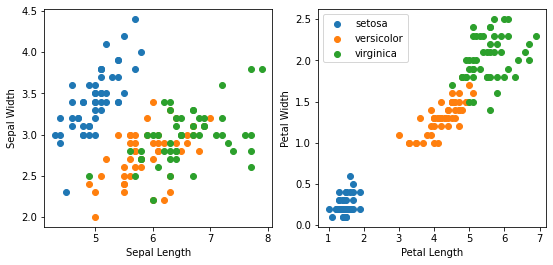

In [12]:
# Visualise measurements for each species
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
for species in iris.species.unique():
    iris_subset = iris.loc[iris.species == species]
    ax1.scatter(iris_subset.sepal_length, iris_subset.sepal_width,
                label=species)
    ax2.scatter(iris_subset.petal_length, iris_subset.petal_width,
                label=species)
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax2.set_xlabel("Petal Length")
ax2.set_ylabel("Petal Width")
plt.legend()
plt.show()

First we need to split our dataset in two, separating our predictors (denoted `X`) and responses (denoted `y`).

In [13]:
X = iris.drop('species', axis=1)
y = iris.species

We can now split our machine learning process into two steps:
- Train a model to predict a flower's species from its measurements
- Test the model to ensure that it works effectively

You may think that we could train and test using the same dataset, but this is bound to lead to problems. Imagine if you were able to revise for an exam by practising the actual exam questions; rather than actually learning how to answer general questions, we may just memorise the correct answers. This is known as _overfitting_.

The opposite of this problem is called _underfitting_, in which our model is not complex enough to learn anything at all.

We can ensure that we are neither underfitting or overfitting by using a train-test split. In this, we split our observations up into two groups, one used for training and one used for testing. We do this using `train_test_split`. Two important parameters are `test_size` and `random_state`. Usually we choose a test set size between 10% and 40% of the data, depending on how many observations we have available (default is 25%).

In [26]:
# Create a train-test split using random state 253, test_size 40%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=253
)

In [27]:
# View sizes of X, X_train, and X_test
print("X has size", X.shape)
print("X_train has size", X_train.shape)
print("X_test has size", X_test.shape)

X has size (150, 4)
X_train has size (90, 4)
X_test has size (60, 4)


## k-Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier

The model we will use to predict new observations' species is called k-nearest neighbours. This works as follows:
- Choose the value of the hyperparameter $k$ (we'll use the default of 5)
- For each new data point, find the $k$ closest points in the training dataset
- Each of these neighbours 'votes' for its class
- The most popular class is used as the prediction

The process for building a machine learning model with sklearn is highly standardised. For supervised learning models it is:
- Create a classifier/regressor (often denoted `clf`/`reg`) passing in any hyperparemeters
- Train the model using the `.fit` method, passing in the training data
- Test the model using the `.predict` method on the testing data

In [16]:
# Create a kNN model using the default hyperparameters
clf = KNeighborsClassifier()

In [23]:
# Train the model
clf.fit(X_train, y_train);

In [24]:
# Predict on the test dataset
clf.predict(X_test)

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa'], dtype=object)

We can now evaluate the model performance though metrics and plots.

In [28]:
# Model accuracy
clf.score(X_test, y_test)

0.95

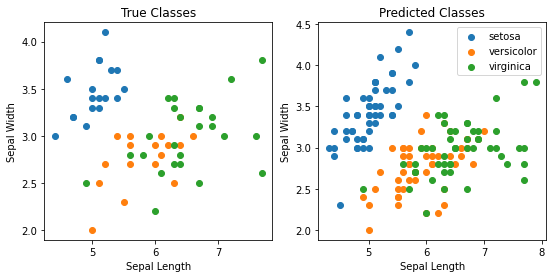

In [40]:
# Visualise measurements for each species
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
for species in iris.species.unique():
    test_subset = X_test.loc[y_test == species]
    ax1.scatter(test_subset.sepal_length, test_subset.sepal_width,
                label=species)
    pred_subset = X.loc[y == species]
    ax2.scatter(pred_subset.sepal_length, pred_subset.sepal_width,
                label=species)
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_title("True Classes")
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")
ax2.set_title("Predicted Classes")
plt.legend()
plt.show()

> **Further Reading (kNN)**
> 
> - [What is k-nearest neighbours?](https://www.youtube.com/watch?v=HVXime0nQeI)
> - [Choosing a distance metric](https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4)
> - [kNN does not work well in high dimensions](https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d)
> - [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

> **Further Reading (Classification)**
> 
> - [The Inaccuracy of Accuracy](https://www.ttested.com/inaccuracy-of-accuracy/)
> - [Confusion matrices](https://en.wikipedia.org/wiki/Confusion_matrix)
> - [ROCs](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
> - [ROC vs PRC](https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves)

### Support Vector Machines

In [55]:
from sklearn.svm import SVR

Support vector machines (SVMs) are an incredibly powerful machine learning tool, heavily derived from ideas in statistical learning theory. For this reason, they combine desirable theoretical properties with strong real-world performance. Loosely, we can think of support vector machines as standard linear regression with the two modifications:

1. Rather than trying to find a line that minimises the sum of squared errors, we try to find a line that has the largest separation of data
2. We first transform our data into a higher dimensional space with more expressivity using the _kernel trick_

These notions are quite advanced, so we will leave them and focus on the practical application of SVMs. Specifically, we will look at their use for regression. Since SVMs are complex models, we often require a large dataset to avoid overfitting.

In this example, we will use a dataset related to diamonds, aiming to predict their price from other characteristics. We will first import this, dummify categorical variables, and create a train-test split.

In [56]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/'
                       'seaborn-data/master/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
X = diamonds.drop('price', axis=1)
# Need a log transform to avoid 'heteroscedasticity'
y = np.log(diamonds.price)

In [58]:
# Dummify categorical variables
numeric = X.select_dtypes(exclude='object')
text = X.select_dtypes(include='object')
text_enc = pd.get_dummies(text, drop_first=True)
X_enc = pd.concat((numeric, text_enc), axis=1)
X_enc.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=253
)

We can now fit a support vector regressor using a similar approach to before. When training with the full data this can take anywhere from a few minutes to about half an hour depending on the speed of your computer.

In [64]:
# Fit and predict using a support vector regressor
regr = SVR()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([6.94546899, 8.27040232, 7.1376837 , ..., 7.01786582, 8.41223901,
       6.59535126])

For regression problems, the most common metric we are interested in is the root mean squared error (RMSE). We calculate this below.

In [66]:
# Calculate test RMSE
regr.score(X_test, y_test)

0.9589777323191567

This number by itself is meaningless. Instead, we need to compare it to a baseline model. Without an existing model to use, we can use the _null model_. This is where we use the mean `y_train` as our prediction for every test set observation. More on this [here](https://youtu.be/nRwovwZCWvg?t=2085).

In [140]:
# Calculate RMSE for null model


1.0245483793194348

> **Further Reading (SVMs)**
> 
> - [What are SVMs?](https://www.youtube.com/watch?v=efR1C6CvhmE&vl=en)
> - [SVM hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
> - [The kernel trick](https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78)

> **Further Reading (Regression)**
> 
> - [RMSE vs MAE](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)
> - [Handling heteroskedasticity](https://rstudio-pubs-static.s3.amazonaws.com/187387_3ca34c107405427db0e0f01252b3fbdb.html)

### k-Means

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

The two approaches above concerned the performance of _supervised learning_. Loosely, this is where we try to predict the labels of data based on a set of known values. What if we don't know the true labels of our data, and instead want to find more general trends in our data based on similarity?

This paradigm is know as _unsupervised learning_. A popular model of this type is k-means. This attempts to group our data into $k$ clusters, where $k$ is a number of our choosing. Once we have these clusters, we can examine them to understand what connects data points in the same group.

For example, we could cluster the purchases of shoppers at a supermarket. This may result in a handful of clusters that may turn out to represent families, young adults, retired etc.

We perform k-means clustering using the `KMeans` class. We will illustrate its use on a dataset about three different varieties of wheat seeds. What differentiates this from the kNN example above is that we don't know which seeds are which in the dataset.

In [92]:
wheat = pd.read_csv('https://archive.ics.uci.edu/ml/'
                    'machine-learning-databases/00236/seeds_dataset.txt',
                    delim_whitespace=True,
                    header=None).iloc[:, :-1]
wheat.head()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


When performing k-means (and many other types of machine learning algorithms), its often advised to centre and scale our data so each column has zero mean and a variance of one. We could easily do this manually using Pandas or NumPy, but we can make it even simpler using sklearn's `StandardScaler`.

In [93]:
# Scale columns


In [94]:
print("Column means:", np.round(wheat_scaled.mean(axis=0), 8))
print("Column variances:", wheat_scaled.var(axis=0))

Column means: [-0.  0.  0. -0. -0. -0. -0.]
Column variances: [1. 1. 1. 1. 1. 1. 1.]


We can now fit a k-means model.

In [95]:
# Predict the cluster assignments for each seed


In [96]:
print(assignment)

[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]


> **Further Reading (k-means)**
> 
> - [What is k-means?](https://www.youtube.com/watch?v=4b5d3muPQmA)
> - [How to choose k](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

> **Further Reading (Clustering)**
> 
> - [Overview of clustering methods](https://scikit-learn.org/stable/modules/clustering.html)
> - [Topic Modelling](https://en.wikipedia.org/wiki/Topic_model)

### Random Forests

Random forests are perhaps the most popular machine learning technique, providing a strong out-of-the-box baseline for a wide range of datasets.

In the name of time, we won't cover them here (as they require some background on decision trees and ensemble methods) but you can learn about them in full through WDSS's [Machine Learning 101](https://youtu.be/q-WGtkP3i9s).

> **Further Reading**
>
> - [Tuning hyperparameters for random forests](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
> - [Bagging (Bootstrap Aggregation)](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
> - [XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html): random forests on steroids

## Hyperparameter tuning

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

We are now familiar with few common machine learning models. We can read more about their parameters and use our intuition to set them to sensible values, but choosing the optimum set of values is often too tough to do manually.

Instead, we create a tuning grid—a collection of all hyperparameter combinations we want to consider—and either search through this systematically or at random, trying to find the best set.

A common approach for this is to use cross-validation, specifically k-fold validation. In this, we split our training dataset into $k$ equally sized parts. We then select each fold one at a time to be our validation data set (think of this as a second test set) and train a model on the remaining data. We calculate model performance on each fold and then average these out. After performing this for each combination of hyperparameters, we choose the set with the best cross-validation score and retest this model on the test set.

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

This process will seem very foreign and complex at first glance. I will be discussing it in more detail in my next office hours.

For now we'll focus on the implementation in sklearn, returning to our diamonds example but now using elastic net regression (the details of this model aren't important; all that matters is that it is fairly fast to train and has parameters to tune). We will test the performance of this model using different values of `alpha`, `l1_ratio`, and `fit_intercept` (read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) for more information).

In [115]:
# Create a parameter grid
tuning_grid = {
    # Keys taken from ElasticNet parameters
    'alpha': [0.2, 0.5, 1, 2, 4],
    # ...
    'fit_intercept': [False, True],
}

In [117]:
# Run cross-validated grid search


In [123]:
# Extract best parameters and corresponding CV score
# ...
print("Obtained score", best_score, "with parameters", best_params)

Obtained score 0.9160567657043899 with parameters {'alpha': 0.2, 'fit_intercept': True, 'l1_ratio': 0.1}


In [124]:
# Use these parameters to fit a final model


In [129]:
# Calculate R^2
1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_test))**2)

0.9177671823187378

In [127]:
# Calculate RMSE
np.sqrt(np.mean(np.square(y_pred - y_test)))

0.2937587316037013

> **Tip**
>
> In practice, it often takes too long to run `GridSearchCV`. Instead you can use `RandomizedSearchCV`.